## Análisis y Evaluación Set de Datos de características y precios de viviendas

In [1]:
# Importar librerías 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') # Evita avisos molestos
%matplotlib inline


### Cargar Dataset y Exploración básica de los datos

In [2]:

# Carga de datos:

df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train.index

RangeIndex(start=0, stop=1460, step=1)

In [8]:
df_train.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

### Análisis de Variable Objetivo 'SalePrice'

In [9]:
# Estadísticas descriptiva:

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

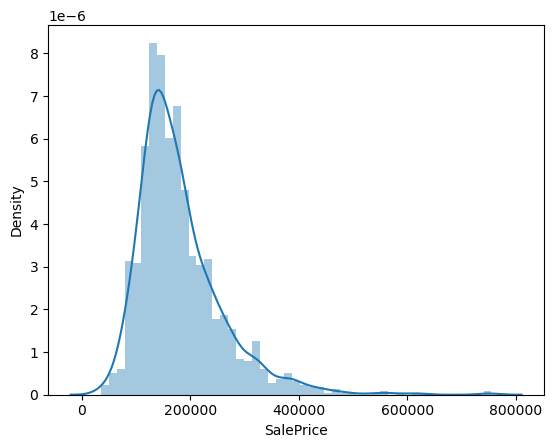

In [10]:
# Histograma:
sns.distplot(df_train['SalePrice'])

## Análisis de relación entre multivariables y variable objetivo(Precio)


Evaluando posibles factores determinantes del precio de las casas en relación a la variable 'GrLivArea'(Superficie habitable en pies cuadrados) y 'YearBuilt'(Año de 
construcción)

In [11]:

df_relacion = pd.concat([df_train['SalePrice'], 
                        df_train['GrLivArea'], 
                        df_train['YearBuilt']], axis=1)
df_relacion.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000


En relación a las variables 'YearBuilt'(Año de construcción), 'TotalBsmtSF'(Superficie del sótano) y 'OverallQual'(Calidad material/acabados)

In [12]:

df_relacion1 = pd.concat([df_train['SalePrice'], 
                        df_train['YearBuilt'],
                        df_train['TotalBsmtSF'],  df_train['OverallQual']], axis=1)
df_relacion1

,SalePrice,YearBuilt,TotalBsmtSF,OverallQual
0,208500,2003,856,7
1,181500,1976,1262,6
2,223500,2001,920,7
3,140000,1915,756,7
4,250000,2000,1145,8
...,...,...,...,...
1455,175000,1999,953,6
1456,210000,1978,1542,6
1457,266500,1941,1152,7
1458,142125,1950,1078,5


### Relación de variables numéricas

Diagrama de dispersión GrlivArea/SalePrice:

In [13]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

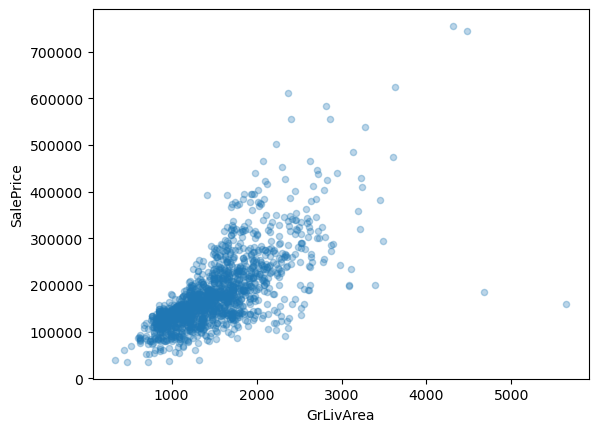

In [14]:
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha = 0.3)

Diagrama de dispersión TotalBsmtsf/SalePrice:

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

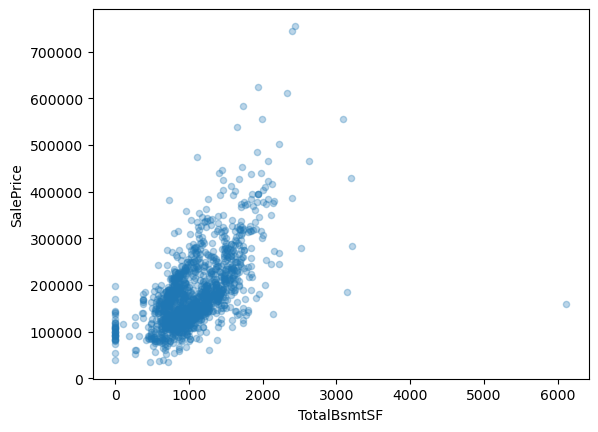

In [15]:
data2 = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data2.plot.scatter(x='TotalBsmtSF', y='SalePrice',  alpha = 0.3)

### Relación de variables categóricas

Diagrama de cajas OverAllQual/SalePrice:

(-0.5, 9.5, 0.0, 800000.0)

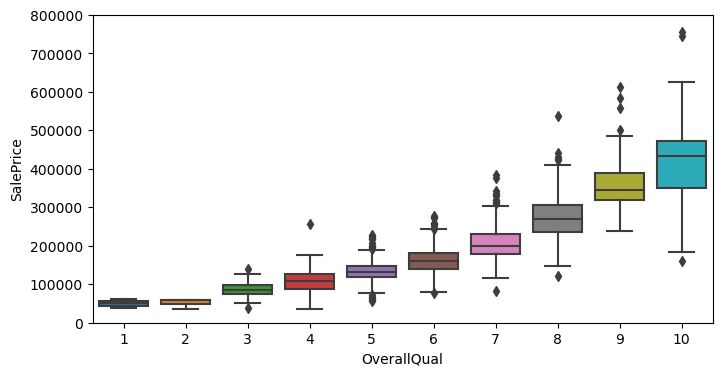

In [16]:
data3 = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8,4))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data3)
fig.axis(ymin=0, ymax=800000)

Diagrama de cajas YearBuilt/SalePrice:

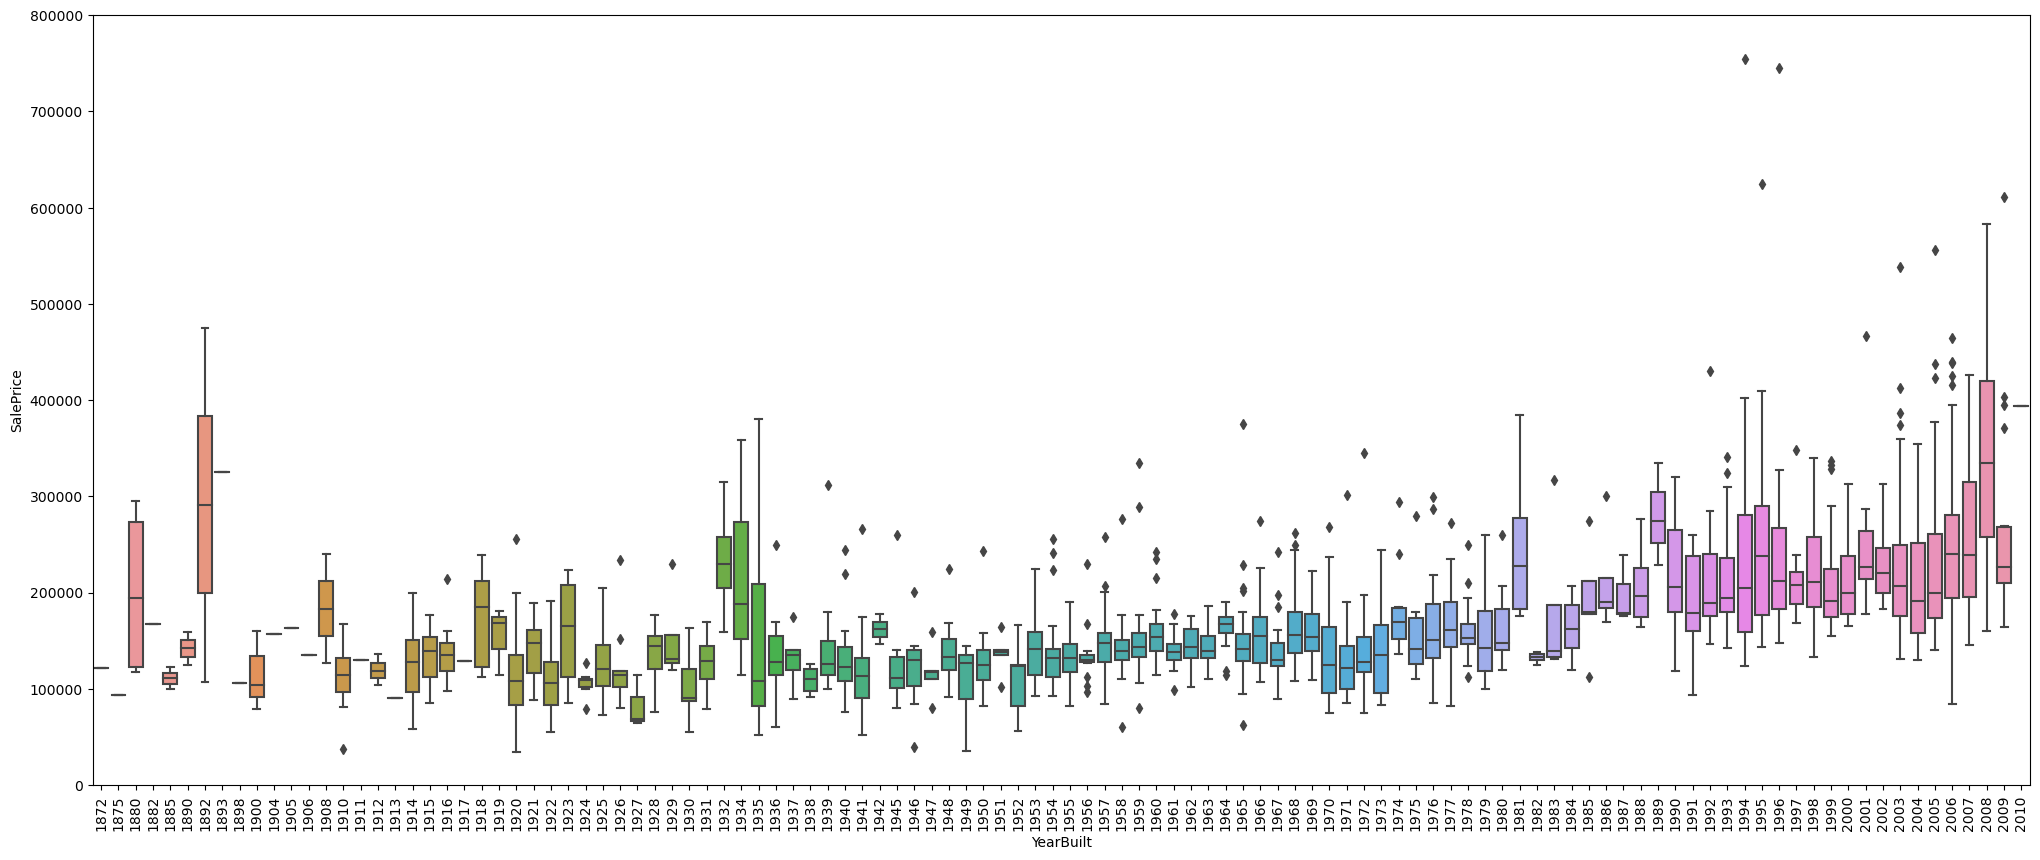

In [17]:
data4 = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(25,10))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data4)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Mantienen una relación lineal positiva con 'SalePrice' las variables:'GrLivArea' y 'TotalBsmtSF', aumentando en el mismo sentido. 
La pendiente en el caso de 'TotalBsmtSF' se encuentra muy acentuada.

'OverallQual' y 'YearBuilt' también se evidencia relación con 'SalePrice', auque más notable en el primer caso.


### Pruebas de Correlación

Matriz de correlación

<Axes: >

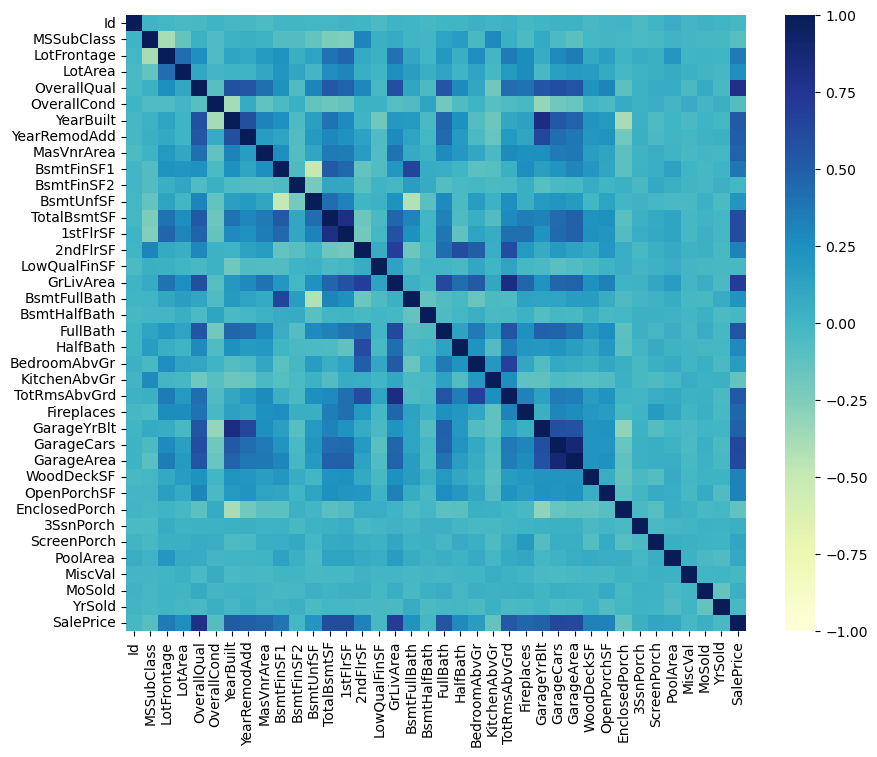

In [18]:
# Heatmap 

matcorr = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matcorr, cmap='YlGnBu', vmax=1, vmin=-1)


Mediante esta representación facilita identificar las variables y la relación entre si; la variable 'SalePrice' se evidencia gran correlación con las variables anteriormente analizadas: 'OverallQual', 'TotalBsmtSF' y 'GrLivArea'. 
Las variables 'TotalBsmtSF' y '1stFlrSF' destacan fuerte correlación, como las variables 'GarageX'.

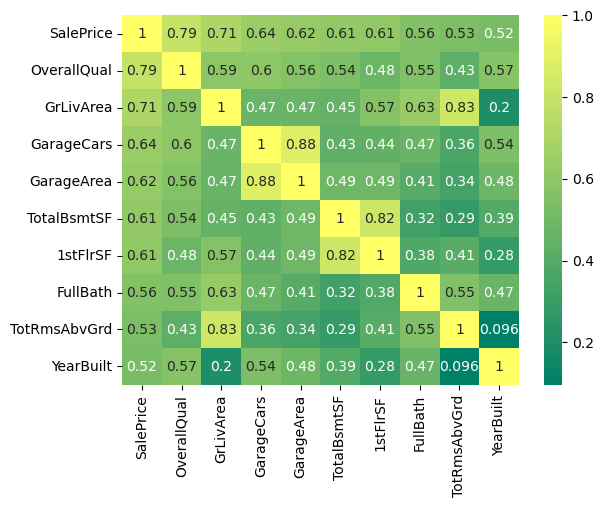

In [19]:
n = 10
colum = matcorr.nlargest(n, 'SalePrice')['SalePrice'].index
xm = np.corrcoef(df_train[colum].values.T)
jm =sns.heatmap(xm, yticklabels = colum.values, xticklabels = colum.values,  annot = True, 
                cmap='summer')
plt.show()

## Correlación en función de la variable objetivo 'SalePrice'

In [20]:

corret = df_train.corr()
corret[['SalePrice']].sort_values(by= 'SalePrice', ascending = False).style.background_gradient()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Se encuentra fuertemente correlacionadas con 'SalePrice' las variables:'OverallQual', 'GrLivArea' 
    'GarageCars' y 'TotalBsmtSF' 
    
'GarageArea' no se tomará encuenta, debido que de ésta dependerá la cantidad de autos que se podrá parquear en el garage.

Caso similar para 'TotalBsmtSF' y '1stFloor'(área en pies cuadrados de primera planta); por lo tanto sólo se analizará 'TotalBsmtSF'(pies cuadrados de sótano).
También se encuentra correlacionada con 'SalePrice' la variable 'FullBath'(baños completos sobre el nivel del suelo). 
'TotRmsAbvGrd'(total de habitaciones por encima del nivel del suelo),
'YearBuilt'(fecha de construcción) se evidencia ligera correlación con 'SalePrice'.


### Diagramas de dispersión entre 'SalePrice' y sus variables correlacionadas

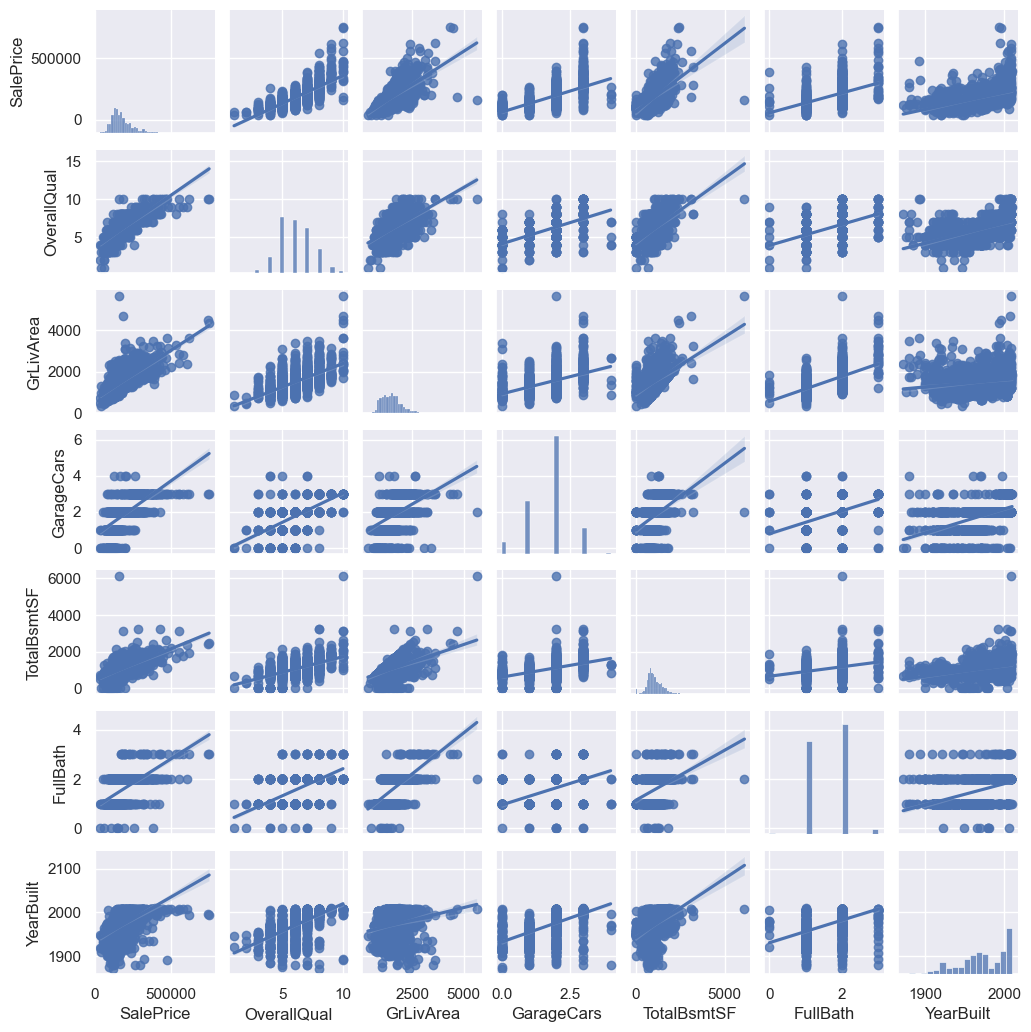

In [21]:

sns.set()
colum = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
         'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[colum], kind = 'reg', size= 1.5)

El gráfico de dispersión facilita la compresión general de la relación entre variables. Se afirma la relación de 'SalePrice' entre las variables 'OverallQual' y 'GrLivArea'.

### Limpieza de datos

Análisis de datos faltantes teniendo en cuenta su importancia, debido que podría implicar reducción del tamaño de la muestra.

In [22]:
# Descubriendo datos nulos:

nulos = df_train.isnull().sum().sort_values(ascending=False)
percentaje = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
datos_nulos = pd.concat([nulos, percentaje], axis = 1, keys = ['Total', 'Percentaje'])
datos_nulos.head(20)

,Total,Percentaje
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Los datos faltantes en las respectivas variables no parecen tan importantes como factores 
determinantes en la compra de una vivienda; por lo tanto se eliminarán dichas variables.
Sin embargo se mantendrá la variable 'Electrical', pese a que sólo falta un elemento.

In [23]:
# Tratamiento de datos faltantes:

df_train = df_train.drop((datos_nulos[datos_nulos['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

# Verificar que no existen más datos nulos:
df_train.isnull().sum().max() 

0

### Datos Atípicos u Outliers

Se estandarizará los datos con el objetivo de definir un umbral y así poder observar valores atípicos mediante la transformación de los valores datos para obtener media de 0 y desviación estándar de 1.

In [24]:
# Estandarización de datos:

saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
# Fuera de la distribución por arriba:
saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

array([[3.82758058],
       [4.0395221 ],
       [4.49473628],
       [4.70872962],
       [4.728631  ],
       [5.06034585],
       [5.42191907],
       [5.58987866],
       [7.10041987],
       [7.22629831]])

In [25]:
# Fuera de la distribución por debajo:
saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

Se encuentran distantes del cero los valores altos; mientras que los valores bajos evidencia cercanía al cero y similitud.